# Lab 2 - ANNDA

In [1]:
import som
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# SOM

## Topological Ordering of Animal Species

In [2]:
# Read in data
animals = np.genfromtxt('data/animals.dat', delimiter=',')
X = animals.reshape((32,84))

In [76]:
# Read animal names - rows
f = open('data/animalnames.txt',"r")
animalnames = f.readlines()
animalnames = [name[1:-3] for name in animalnames[:-1]] + [animalnames[-1][1:-1]]
f.close()

In [77]:
# Read attrib names - columns
f = open('data/animalattributes.txt',"r")
attribnames = f.readlines()
attribnames = [name[:-1] for name in attribnames[:-1]] + [attribnames[-1]]
f.close()

In [78]:
# Turn data into dataframe
df = pd.DataFrame(X,columns = attribnames)
df = df.set_index([animalnames]).astype(int)

In [79]:
df

,antlered,articulations,barks,big,bigears,biting,black,blood,brown,climbing,...,twowinged,warmblooded,waterliving,verybig,verylongears,verysmall,white,wingless,wings,yellow
antelop,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
ape,0,0,0,1,0,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0
bat,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
bear,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0
beetle,0,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
butterfly,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
camel,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
cat,0,0,0,0,0,0,1,1,0,1,...,0,1,0,0,0,0,0,0,0,0
crocodile,0,0,0,1,0,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,0
dog,0,0,1,0,0,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0


### 1D Output Topology

In [80]:
# Define SOM architecture
in_dim = len(attribnames)
out_shape = (50,1) # Output topology
somnet = som.SOM(in_dim,out_shape,is_circular=False)

In [81]:
# Initialize weights
W_init = np.random.uniform(0, 1, size=(somnet.in_dim, somnet.out_shape[0], somnet.out_shape[1]))
somnet.initialize_weights(np.copy(W_init))

In [82]:
# Train weights
lr = 0.2 # Step size
n_epochs = 20 # Number of epochs
init_th = 20 # Manhattan initial distance threshold for neighbourhood
somnet.train(X.T,lr,n_epochs,init_th)

In [83]:
# Find output topology
winners = somnet.output_topology(X.T)
winners = np.array([winner[0] for winner in winners])
sorting_indices = np.argsort(winners)
winners_sorted = winners[sorting_indices]
winners_sorted_names = [animalnames[i] for i in sorting_indices]

In [84]:
winners_sorted

array([ 0,  0,  1,  3,  5,  5,  8, 12, 12, 16, 16, 19, 21, 22, 25, 28, 30,
       30, 33, 35, 35, 38, 38, 40, 43, 43, 45, 46, 47, 49, 49, 49])

In [85]:
winners_sorted_names

['grasshopper',
 'beetle',
 'dragonfly',
 'butterfly',
 'moskito',
 'housefl',
 'spider',
 'pelican',
 'duck',
 'penguin',
 'ostrich',
 'frog',
 'seaturtle',
 'crocodile',
 'walrus',
 'dog',
 'bear',
 'hyena',
 'ape',
 'lion',
 'cat',
 'skunk',
 'bat',
 'elephant',
 'rabbit',
 'rat',
 'kangaroo',
 'antelop',
 'hors',
 'camel',
 'pig',
 'giraffe']

### 2D Output Topology

In [50]:
# Define SOM architecture
in_dim = len(attribnames)
out_shape = (7,7) # Output topology
somnet = som.SOM(in_dim,out_shape,is_circular=False)

In [51]:
# Initialize weights
W_init = np.random.uniform(0, 1, size=(somnet.in_dim, somnet.out_shape[0], somnet.out_shape[1]))
somnet.initialize_weights(np.copy(W_init))

In [52]:
# Train weights
lr = 0.2 # Step size
n_epochs = 20 # Number of epochs
init_th = 5 # Manhattan initial distance threshold for neighbourhood
somnet.train(X.T,lr,n_epochs,init_th)

In [56]:
# Find output topology
winners = somnet.output_topology(X.T)
winners_grid = np.full((somnet.out_shape[0],somnet.out_shape[1]),-1,dtype='int')
animals_grid = np.full((somnet.out_shape[0],somnet.out_shape[1]),'none',dtype='object')
i = 0
for winner in winners :
    winners_grid[winner] = i
    animals_grid[winner] = animalnames[i]
    i += 1

In [57]:
winners_grid, animals_grid

(array([[10, -1, -1, 15, -1, 14, 29],
        [-1, 30, -1, -1,  1, -1, -1],
        [ 4, 21, -1, 24, -1, -1, 27],
        [-1, -1, 22, -1, 11, 26, 31],
        [-1, 20, -1, -1, 23, -1, 28],
        [19, -1, -1, -1, -1, -1, -1],
        [25, 18,  2, -1, -1, -1, 13]]),
 array([['dragonfly', 'none', 'none', 'grasshopper', 'none', 'giraffe',
         'skunk'],
        ['none', 'spider', 'none', 'none', 'ape', 'none', 'none'],
        ['beetle', 'moskito', 'none', 'penguin', 'none', 'none', 'rat'],
        ['none', 'none', 'ostrich', 'none', 'duck', 'rabbit', 'walrus'],
        ['none', 'lion', 'none', 'none', 'pelican', 'none', 'seaturtle'],
        ['kangaroo', 'none', 'none', 'none', 'none', 'none', 'none'],
        ['pig', 'hyena', 'bat', 'none', 'none', 'none', 'frog']],
       dtype=object))

## Cyclic Tour

In [2]:
# Cities position data
kth_building_pos = [[0.4000, 0.4439],
                    [0.2439, 0.1463],
                    [0.1707, 0.2293],
                    [0.2293, 0.7610],
                    [0.5171, 0.9414],
                    [0.8732, 0.6536],
                    [0.6878, 0.5219],
                    [0.8488, 0.3609],
                    [0.6683, 0.2536],
                    [0.6195, 0.2634]]
building_names = ['Q','U','B','K','L','E','A','C','M','N']
attrib_names = ['x_coord','y_coord']
X = np.array(kth_building_pos)

In [3]:
# Turn data into dataframe
df = pd.DataFrame(X,columns = attrib_names)
df = df.set_index([building_names])
df.index.name = 'KTH buildings'
df

,x_coord,y_coord
KTH buildings,,
Q,0.4000,0.4439
U,0.2439,0.1463
B,0.1707,0.2293
K,0.2293,0.7610
L,0.5171,0.9414
E,0.8732,0.6536
A,0.6878,0.5219
C,0.8488,0.3609
M,0.6683,0.2536


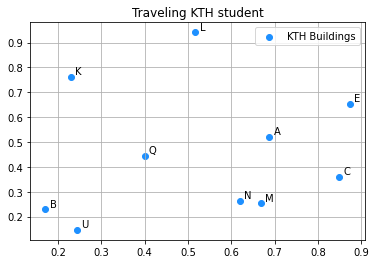

In [4]:
# Plot cities
som.plot_cities(X.T,building_names)

### 1D Output Topology

In [5]:
# Define SOM architecture
in_dim = len(attrib_names)
out_shape = (20,1) # Output topology
somnet = som.SOM(in_dim,out_shape,is_circular=True)

In [6]:
# Initialize weights
W_init = np.random.uniform(0, 1, size=(somnet.in_dim, somnet.out_shape[0], somnet.out_shape[1]))
somnet.initialize_weights(np.copy(W_init))

In [7]:
# Train weights
lr = 0.2 # Step size
n_epochs = 20 # Number of epochs
init_th = 3 # Manhattan initial distance threshold for neighbourhood
somnet.train(X.T,lr,n_epochs,init_th)

In [8]:
# Find output topology
winners = somnet.output_topology(X.T)
winners = np.array([winner[0] for winner in winners])
sorting_indices = np.argsort(winners)
winners_sorted = winners[sorting_indices]
winners_sorted_names = [building_names[i] for i in sorting_indices]

In [9]:
winners_sorted

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])

In [10]:
winners_sorted_names

['N', 'B', 'U', 'Q', 'L', 'K', 'A', 'E', 'C', 'M']

In [11]:
# Create traveling KTH student path
path = X.T[:,sorting_indices]

In [12]:
# Calculate path length
path_length = som.calculate_perimeter(path)
path_length

3.0455663073766774

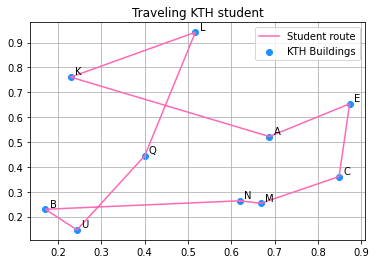

In [13]:
# Plot traveling KTH student route
som.plot_cities_route(X.T,path,building_names)